In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [10]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx")

df.head()


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [11]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [20]:
Total_sales = df['Sales'].sum()
print("Total Sales:", Total_sales)


Total Sales: 899902125.0


In [13]:
# Cell 0 — Setup: run once at top of notebook
import numpy as np
import pandas as pd
from pathlib import Path

FILE_PATH = Path("Adidas US Sales Datasets.xlsx")  # change if needed

# Helpful normalization for common alternate column names
COL_MAP = {
    'total sales':'Sales', 'sales':'Sales', 'revenue':'Sales',
    'profit':'Profit', 'operating profit':'Profit',
    'order date':'Order Date', 'invoice date':'Order Date', 'date':'Order Date',
    'discount':'Discount', 'discount %':'Discount',
    'product name':'Product Name', 'product':'Product Name',
    'sub-category':'Sub-Category', 'subcategory':'Sub-Category',
    'quantity':'Quantity', 'units sold':'Quantity', 'qty':'Quantity',
    'market':'Market', 'region':'Region', 'country':'Country', 'state':'State', 'city':'City',
    'segment':'Segment', 'customer name':'Customer Name', 'customer':'Customer Name',
    'order id':'Order ID', 'invoice id':'Order ID'
}

def load_and_normalize(path=FILE_PATH, col_map=COL_MAP):
    xls = pd.read_excel(path, sheet_name=None, engine='openpyxl')
    first_sheet = list(xls.keys())[0]
    df = xls[first_sheet].copy()
    ren = {}
    for c in df.columns:
        key = c.strip().lower()
        ren[c] = col_map.get(key, c.strip())
    df.rename(columns=ren, inplace=True)
    # try parse date and numeric fields
    if 'Order Date' in df.columns:
        df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    for num in ['Sales','Profit','Discount','Quantity']:
        if num in df.columns:
            df[num] = pd.to_numeric(df[num], errors='coerce').fillna(0)
    return df

df = load_and_normalize()
print("Loaded", FILE_PATH, "-> df shape:", df.shape)
print("Columns:", list(df.columns))


Loaded Adidas US Sales Datasets.xlsx -> df shape: (9648, 13)
Columns: ['Retailer', 'Retailer ID', 'Order Date', 'Region', 'State', 'City', 'Product Name', 'Price per Unit', 'Quantity', 'Sales', 'Profit', 'Operating Margin', 'Sales Method']


**Q1 — What is the total sales revenue across all countries?**

In [ ]:
# Cell Q1
assert 'Sales' in df.columns, "Missing 'Sales' column."

total_sales = df['Sales'].sum()

print("Total Sales:", total_sales)

print(total_sales)


Total Sales: 899902125.0
899902125.0


**Q2 — Region (or Country) with highest and lowest profit**

In [16]:
# Cell Q2
assert 'Profit' in df.columns, "Missing 'Profit' column."
group_col = 'Region' if 'Region' in df.columns else ('Country' if 'Country' in df.columns else None)
if group_col is None:
    raise KeyError("No 'Region' or 'Country' column found.")
region_profit = df.groupby(group_col)['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
print("Top 5 by profit:\n", region_profit.head())
print("\nBottom 5 by profit:\n", region_profit.tail())
region_profit


Top 5 by profit:
       Region       Profit
4       West  89609406.55
1  Northeast  68020587.65
2      South  61138004.07
3  Southeast  60555416.70
0    Midwest  52811346.48

Bottom 5 by profit:
       Region       Profit
4       West  89609406.55
1  Northeast  68020587.65
2      South  61138004.07
3  Southeast  60555416.70
0    Midwest  52811346.48


,Region,Profit
4,West,89609406.55
1,Northeast,68020587.65
2,South,61138004.07
3,Southeast,60555416.70
0,Midwest,52811346.48


**Q3 — Sales contribution (%) of each market/country/region**

In [17]:
# Cell Q3
assert 'Sales' in df.columns, "Missing 'Sales'."
group_col = 'Market' if 'Market' in df.columns else ('Country' if 'Country' in df.columns else ('Region' if 'Region' in df.columns else None))
if group_col is None:
    raise KeyError("No Market/Country/Region column found.")
contrib = df.groupby(group_col)['Sales'].sum().reset_index()
total = contrib['Sales'].sum()
contrib['Sales_Pct'] = contrib['Sales'] / total * 100
contrib = contrib.sort_values('Sales', ascending=False).reset_index(drop=True)
contrib


,Region,Sales,Sales_Pct
0,West,269943182.0,29.996949
1,Northeast,186324067.0,20.704926
2,Southeast,163171236.0,18.132109
3,South,144663181.0,16.075435
4,Midwest,135800459.0,15.090581


**Q4 — Monthly sales and profits across the year**

In [21]:
# Cell Q4
assert 'Sales' in df.columns and 'Profit' in df.columns, "Need 'Sales' and 'Profit'."
assert 'Order Date' in df.columns, "Need 'Order Date'."
tmp = df.copy()
tmp['Year'] = tmp['Order Date'].dt.year
tmp['Month'] = tmp['Order Date'].dt.month
monthly = tmp.groupby(['Year','Month'])[['Sales','Profit']].sum().reset_index().sort_values(['Year','Month'])
monthly


,Year,Month,Sales,Profit
0,2020,1,16253746.0,5830005.41
1,2020,2,14997988.0,5207354.44
2,2020,3,17660577.0,5862006.26
3,2020,4,24607006.0,9301293.34
4,2020,5,16918014.0,5870841.95
5,2020,6,8829819.0,2292727.41
6,2020,7,17146013.0,4917665.11
7,2020,8,19877980.0,7338924.54
8,2020,9,18304436.0,7119702.44
9,2020,10,10836269.0,4139469.21


**Q5 — Months with highest discounts and impact on profit**

In [46]:
# CLEAN + GUARANTEED-WORKING Q5 (Discount/Proxy → Monthly Summary)

import numpy as np
import pandas as pd

assert 'Sales' in df.columns and 'Profit' in df.columns, "Need 'Sales' and 'Profit'"
assert 'Order Date' in df.columns, "Need 'Order Date'"

tmp = df.copy()

# ensure numeric
for col in ['Price per Unit','Quantity','Sales','Profit','Operating Margin']:
    if col in tmp.columns:
        tmp[col] = pd.to_numeric(tmp[col], errors='coerce')

# --- STEP 1: Get or create a DISCOUNT column ---------------------------------
if 'Discount' in tmp.columns:
    discount_source = "explicit"
    tmp['Discount'] = pd.to_numeric(tmp['Discount'], errors='coerce')

else:
    # Try implied discount from list price
    if ('Price per Unit' in tmp.columns) and ('Quantity' in tmp.columns):
        list_total = tmp['Price per Unit'] * tmp['Quantity']
        mask = list_total > 0

        implied = (list_total - tmp['Sales']) / list_total * 100
        implied = implied.where(mask).clip(0, 100)

        if implied.notna().sum() > 0:
            tmp['Discount'] = implied
            discount_source = "implied_from_priceunit_x_quantity"
        else:
            tmp['Discount'] = np.nan
            discount_source = None
    else:
        tmp['Discount'] = np.nan
        discount_source = None

# If still nothing usable → fall back to operating margin proxy
if discount_source is None:
    if 'Operating Margin' in tmp.columns:
        discount_source = "operating_margin_proxy"
        tmp['Discount_Proxy'] = tmp['Operating Margin']
    else:
        discount_source = "none"


# --- STEP 2: Create Year + Month ---------------------------------------------
tmp['Year'] = tmp['Order Date'].dt.year
tmp['Month'] = tmp['Order Date'].dt.month

# --- STEP 3: Build the monthly summary ---------------------------------------

if discount_source in ("explicit", "implied_from_priceunit_x_quantity"):
    monthly_disc = tmp.groupby(['Year','Month']).agg(
        Avg_Discount=('Discount','mean'),
        Total_Sales=('Sales','sum'),
        Total_Profit=('Profit','sum'),
        Orders=('Sales','count')
    ).reset_index()

    monthly_disc = monthly_disc.sort_values('Avg_Discount', ascending=False).reset_index(drop=True)

elif discount_source == "operating_margin_proxy":
    monthly_disc = tmp.groupby(['Year','Month']).agg(
        Avg_Operating_Margin=('Discount_Proxy','mean'),
        Total_Sales=('Sales','sum'),
        Total_Profit=('Profit','sum'),
        Orders=('Sales','count')
    ).reset_index()

    monthly_disc = monthly_disc.sort_values('Avg_Operating_Margin', ascending=False).reset_index(drop=True)

else:
    # no discount or proxy at all
    monthly_disc = tmp.groupby(['Year','Month']).agg(
        Avg_Discount=('Discount','mean'),
        Total_Sales=('Sales','sum'),
        Total_Profit=('Profit','sum'),
        Orders=('Sales','count')
    ).reset_index()


print("Discount source used:", discount_source)
monthly_disc


Discount source used: explicit


,Year,Month,Avg_Discount,Total_Sales,Total_Profit,Orders
0,2020,1,0.0,16253746.0,5830005.41,150
1,2020,2,0.0,14997988.0,5207354.44,114
2,2020,3,0.0,17660577.0,5862006.26,131
3,2020,4,0.0,24607006.0,9301293.34,130
4,2020,5,0.0,16918014.0,5870841.95,95
5,2020,6,0.0,8829819.0,2292727.41,60
6,2020,7,0.0,17146013.0,4917665.11,104
7,2020,8,0.0,19877980.0,7338924.54,139
8,2020,9,0.0,18304436.0,7119702.44,96
9,2020,10,0.0,10836269.0,4139469.21,86


**Q6 — Top 5 most profitable product subcategories**

In [27]:
# Cell Q6
assert 'Profit' in df.columns, "Need 'Profit'."
assert 'Sub-Category' in df.columns or 'Product Name' in df.columns, "Need 'Sub-Category' or 'Product Name'."
if 'Sub-Category' in df.columns:
    subcat_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
    top5 = subcat_profit.head(5)
else:
    prod_profit = df.groupby('Product Name')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)
    top5 = prod_profit.head(5)
print(top5)
top5


              Product Name       Profit
2    Men's Street Footwear  82802260.62
3          Women's Apparel  68650970.56
1  Men's Athletic Footwear  51846888.19
5  Women's Street Footwear  45095826.81
0            Men's Apparel  44763030.33


,Product Name,Profit
2,Men's Street Footwear,82802260.62
3,Women's Apparel,68650970.56
1,Men's Athletic Footwear,51846888.19
5,Women's Street Footwear,45095826.81
0,Men's Apparel,44763030.33


**Q7 — Product with highest sales volume (quantity) and its top market**

In [29]:
# Cell Q7
assert 'Product Name' in df.columns, "Need 'Product Name'."
results = {}
if 'Quantity' in df.columns:
    by_qty = df.groupby('Product Name')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
    results['top_by_quantity'] = by_qty.iloc[0].to_dict()
    prod_q = by_qty.iloc[0]['Product Name']
    if 'Market' in df.columns:
        top_market_qty = df[df['Product Name']==prod_q].groupby('Market')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False)
        results['top_market_by_quantity'] = top_market_qty.iloc[0].to_dict() if not top_market_qty.empty else None

if 'Sales' in df.columns:
    by_sales = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)
    results['top_by_sales'] = by_sales.iloc[0].to_dict()
    prod_s = by_sales.iloc[0]['Product Name']
    if 'Market' in df.columns:
        top_market_sales = df[df['Product Name']==prod_s].groupby('Market')['Sales'].sum().reset_index().sort_values('Sales', ascending=False)
        results['top_market_by_sales'] = top_market_sales.iloc[0].to_dict() if not top_market_sales.empty else None

print(results)


{'top_by_quantity': {'Product Name': "Men's Street Footwear", 'Quantity': 593320}, 'top_by_sales': {'Product Name': "Men's Street Footwear", 'Sales': 208826244.0}}


**Q8 — Average Order Value (AOV) for each customer segment**

In [32]:
# Robust Cell Q8 — AOV by segment with fallbacks
import numpy as np
import pandas as pd

# Ensure Sales numeric
if 'Sales' in df.columns:
    df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce').fillna(0)
else:
    raise KeyError("Dataset must contain a 'Sales' column to compute AOV.")

# Choose grouping column: Segment -> Customer Name -> Retailer -> Region -> Sales Method
candidates = ['Segment','Customer Name','Retailer','Region','Sales Method']
group_col = next((c for c in candidates if c in df.columns), None)

if group_col is None:
    # No sensible group column found — compute overall AOV only
    if 'Order ID' in df.columns:
        orders_all = df.groupby('Order ID')['Sales'].sum()
        overall_aov = orders_all.mean()
    else:
        overall_aov = df['Sales'].mean()  # average row sales
    print("No grouping column found. Overall AOV =", overall_aov)
    aov = pd.DataFrame([{'Group': 'Overall', 'AOV': overall_aov}])
else:
    print("Grouping by:", group_col)
    if 'Order ID' in df.columns:
        # Compute sales per order, then average per group
        orders = df.groupby([group_col, 'Order ID'])['Sales'].sum().reset_index()
        aov = orders.groupby(group_col)['Sales'].mean().reset_index().rename(columns={'Sales':'AOV'})
    else:
        # Fallback: average row-level sale per group (approximate)
        tmp = df.groupby(group_col)['Sales'].agg(['sum','count']).reset_index()
        tmp['AOV'] = tmp['sum'] / tmp['count']
        aov = tmp[[group_col, 'AOV']].rename(columns={group_col: 'Group'})

# Normalize column name for display
if 'AOV' in aov.columns and group_col and 'Group' not in aov.columns:
    aov = aov.rename(columns={group_col: 'Group'})

# Sort and show top groups
aov = aov.sort_values('AOV', ascending=False).reset_index(drop=True)
print(aov.head(10))
aov


Grouping by: Retailer
           Group            AOV
0        Walmart  119102.891374
1      West Gear  102343.863943
2         Kohl's   99140.536893
3  Sports Direct   89798.718996
4    Foot Locker   83464.057641
5         Amazon   81874.512118


,Group,AOV
0,Walmart,119102.891374
1,West Gear,102343.863943
2,Kohl's,99140.536893
3,Sports Direct,89798.718996
4,Foot Locker,83464.057641
5,Amazon,81874.512118


**Q9 — Customer with highest total sales and their order frequency**

In [45]:
# Robust Cell Q9 — top customer (with fallbacks) and order frequency estimate
import numpy as np
import pandas as pd

# Ensure Sales exists
if 'Sales' not in df.columns:
    raise KeyError("Dataset must contain a 'Sales' column to compute top customer.")

# Choose grouping column (fallbacks)
candidates = ['Customer Name', 'Retailer', 'Retailer ID', 'Sales Method', 'City']
group_col = next((c for c in candidates if c in df.columns), None)

if group_col is None:
    # No grouping column available — produce overall top rows as fallback
    print("No customer/retailer-like column found. Showing top rows by Sales instead.")
    top_rows = df.sort_values('Sales', ascending=False).head(10)
    result = {'method': 'no_group_column', 'top_rows_sample': top_rows}
    display(top_rows)
else:
    print(f"Using grouping column: '{group_col}'")
    # Aggregate total sales by group
    cust_tot = df.groupby(group_col)['Sales'].sum().reset_index().sort_values('Sales', ascending=False).reset_index(drop=True)
    display(cust_tot.head(10))  # show top 10 for quick view

    top_customer = cust_tot.iloc[0].to_dict()
    key_val = top_customer[group_col]

    # Compute frequency
    freq = {}
    cust_rows = df[df[group_col] == key_val].copy()

    # Use Order ID + Order Date when available (best)
    if 'Order ID' in df.columns and 'Order Date' in df.columns:
        cust_rows = cust_rows.dropna(subset=['Order ID','Order Date'])
        total_orders = cust_rows['Order ID'].nunique()
        first = cust_rows['Order Date'].min()
        last = cust_rows['Order Date'].max()
        days = (last - first).days if pd.notnull(first) and pd.notnull(last) else np.nan
        orders_per_year = total_orders / (days/365.25) if days and days > 0 else np.nan
        freq = {'method': 'order_id_and_dates',
                'total_orders': int(total_orders) if not pd.isna(total_orders) else total_orders,
                'first_order': first,
                'last_order': last,
                'orders_per_year': float(orders_per_year) if not pd.isna(orders_per_year) else np.nan}
    # If no Order ID, but Order Date exists, estimate orders as row-count and compute per-year rate
    elif 'Order Date' in df.columns:
        cust_rows = cust_rows.dropna(subset=['Order Date'])
        rows_count = len(cust_rows)
        first = cust_rows['Order Date'].min() if rows_count>0 else pd.NaT
        last = cust_rows['Order Date'].max() if rows_count>0 else pd.NaT
        days = (last - first).days if pd.notnull(first) and pd.notnull(last) else np.nan
        orders_per_year = rows_count / (days/365.25) if days and days > 0 else np.nan
        freq = {'method': 'rows_and_dates_estimate',
                'rows_count': int(rows_count),
                'first_row_date': first,
                'last_row_date': last,
                'rows_per_year_estimate': float(orders_per_year) if not pd.isna(orders_per_year) else np.nan}
    else:
        # No date/order information — give simple row count
        rows_count = len(cust_rows)
        freq = {'method': 'rows_only', 'rows_count': int(rows_count)}

    result = {
        'group_col': group_col,
        'top_customer': top_customer,
        'frequency': freq,
        'top_10_table': cust_tot.head(10)
    }

# Print compact summary
if group_col is not None:
    print("\nTop buyer summary:")
    print(f"  {group_col}: {result['top_customer'][group_col]}")
    print(f"  Total Sales: {result['top_customer']['Sales']:.2f}")
    print("  Frequency info:", result['frequency'])

result


Using grouping column: 'Retailer'


,Retailer,Sales
0,West Gear,242964333.0
1,Foot Locker,220094720.0
2,Sports Direct,182470997.0
3,Kohl's,102114753.0
4,Amazon,77698912.0
5,Walmart,74558410.0



Top buyer summary:
  Retailer: West Gear
  Total Sales: 242964333.00
  Frequency info: {'method': 'rows_and_dates_estimate', 'rows_count': 2374, 'first_row_date': Timestamp('2020-01-02 00:00:00'), 'last_row_date': Timestamp('2021-12-23 00:00:00'), 'rows_per_year_estimate': 1202.640083217753}


{'group_col': 'Retailer',
 'top_customer': {'Retailer': 'West Gear', 'Sales': 242964333.0},
 'frequency': {'method': 'rows_and_dates_estimate',
  'rows_count': 2374,
  'first_row_date': Timestamp('2020-01-02 00:00:00'),
  'last_row_date': Timestamp('2021-12-23 00:00:00'),
  'rows_per_year_estimate': 1202.640083217753},
 'top_10_table':         Retailer        Sales
 0      West Gear  242964333.0
 1    Foot Locker  220094720.0
 2  Sports Direct  182470997.0
 3         Kohl's  102114753.0
 4         Amazon   77698912.0
 5        Walmart   74558410.0}

**Q10 — City with highest sales and associated profit margin**

In [35]:
# Cell Q10
assert 'Sales' in df.columns and 'Profit' in df.columns and 'City' in df.columns, "Need 'Sales','Profit','City'."
city_stats = df.groupby('City').agg(Total_Sales=('Sales','sum'), Total_Profit=('Profit','sum')).reset_index()
city_stats['Profit_Margin_Pct'] = (city_stats['Total_Profit'] / city_stats['Total_Sales']).replace([np.inf,-np.inf], np.nan) * 100
top_city = city_stats.sort_values('Total_Sales', ascending=False).iloc[0].to_dict()

print(f'top_city :', top_city, 'city_table:' , city_stats)


top_city : {'City': 'Charleston', 'Total_Sales': 39974797.0, 'Total_Profit': 15607190.110000001, 'Profit_Margin_Pct': 39.04257502545917} city_table:               City  Total_Sales  Total_Profit  Profit_Margin_Pct
0           Albany   24427804.0    9429850.91          38.602942
1      Albuquerque   19865016.0    6738060.41          33.919230
2        Anchorage   14753103.0    4498345.86          30.490846
3          Atlanta   18997466.0    6893289.61          36.285311
4        Baltimore    7758059.0    2757642.12          35.545516
5         Billings   15710886.0    6232037.55          39.667003
6       Birmingham   17633424.0    9147581.39          51.876376
7            Boise   19276878.0    8121115.10          42.128788
8           Boston   11076810.0    3353875.87          30.278355
9       Burlington   14352923.0    5785966.49          40.312113
10      Charleston   39974797.0   15607190.11          39.042575
11       Charlotte   23956531.0    9756422.87          40.725524
12    

**Q11 — How sales and profits vary across regions and countries**

In [36]:
# Cell Q11
assert 'Sales' in df.columns and 'Profit' in df.columns, "Need 'Sales' and 'Profit'."
if 'Region' in df.columns and 'Country' in df.columns:
    gp = df.groupby(['Region','Country'])[['Sales','Profit']].sum().reset_index().sort_values(['Region','Sales'], ascending=[True,False])
elif 'Region' in df.columns:
    gp = df.groupby('Region')[['Sales','Profit']].sum().reset_index().sort_values('Sales', ascending=False)
elif 'Country' in df.columns:
    gp = df.groupby('Country')[['Sales','Profit']].sum().reset_index().sort_values('Sales', ascending=False)
else:
    raise KeyError("No 'Region' or 'Country' column found.")
gp


,Region,Sales,Profit
4,West,269943182.0,89609406.55
1,Northeast,186324067.0,68020587.65
3,Southeast,163171236.0,60555416.70
2,South,144663181.0,61138004.07
0,Midwest,135800459.0,52811346.48


**Q12 — Overall discount percentage and effect on profit margins**

In [44]:
# Robust Cell Q12 — overall discount & effect on profit margins (works with your columns)
import numpy as np
import pandas as pd

# Required: Sales and Profit must exist
assert 'Sales' in df.columns and 'Profit' in df.columns, "Dataset must contain 'Sales' and 'Profit'."

tmp = df.copy()

# ensure numeric types for relevant fields
for c in ['Price per Unit', 'Quantity', 'Sales', 'Profit', 'Discount', 'Operating Margin']:
    if c in tmp.columns:
        tmp[c] = pd.to_numeric(tmp[c], errors='coerce')

discount_source = None

# 1) Prefer explicit Discount column if present
if 'Discount' in tmp.columns and tmp['Discount'].notna().sum() > 0:
    discount_source = 'explicit'
    tmp['Discount'] = tmp['Discount'].clip(lower=0)  # sanitize negatives if any

# 2) Else try to compute implied discount from Price per Unit * Quantity vs Sales
elif ('Price per Unit' in tmp.columns) and ('Quantity' in tmp.columns) and ('Sales' in tmp.columns):
    list_total = tmp['Price per Unit'] * tmp['Quantity']
    valid = (list_total > 0) & (~list_total.isna())
    tmp['Discount'] = np.nan
    tmp.loc[valid, 'Discount'] = (list_total[valid] - tmp.loc[valid, 'Sales']) / list_total[valid] * 100
    # Clip to reasonable percent range
    tmp['Discount'] = tmp['Discount'].clip(lower=0, upper=100)
    # consider it valid only if we got at least one non-null value
    if tmp['Discount'].notna().sum() > 0:
        discount_source = 'implied_from_priceunit_x_quantity'
    else:
        tmp.drop(columns=['Discount'], inplace=True, errors='ignore')

# 3) Else fallback to Operating Margin as a proxy (clearly labeled)
if discount_source is None:
    if 'Operating Margin' in tmp.columns and tmp['Operating Margin'].notna().sum() > 0:
        discount_source = 'operating_margin_proxy'
        # we will not overwrite a Discount column — use a proxy column
        tmp['Operating_Margin_Proxy'] = tmp['Operating Margin']
    else:
        discount_source = 'none_available'

# Compute KPIs
total_sales = tmp['Sales'].sum()
total_profit = tmp['Profit'].sum()
overall_margin_pct = (total_profit / total_sales * 100) if total_sales != 0 else np.nan

result = {'discount_source': discount_source, 'overall_margin_pct': overall_margin_pct}

if discount_source in ('explicit', 'implied_from_priceunit_x_quantity'):
    # Average discount (simple) and sales-weighted discount
    avg_discount = tmp['Discount'].mean()
    weighted_discount = (tmp['Discount'] * tmp['Sales']).sum() / total_sales if total_sales != 0 else np.nan

    # create bins for Discount
    tmp['Discount_Bin'] = pd.cut(tmp['Discount'], bins=[-1,0,5,10,20,100], labels=['None','0-5','5-10','10-20','20+'])
    by_bin = tmp.groupby('Discount_Bin').agg(
        Total_Sales=('Sales','sum'),
        Total_Profit=('Profit','sum'),
        Avg_Discount=('Discount','mean'),
    ).reset_index()
    by_bin['Profit_Margin_Pct'] = (by_bin['Total_Profit'] / by_bin['Total_Sales']).replace([np.inf, -np.inf], np.nan) * 100

    # sort by Avg_Discount for convenience
    by_bin = by_bin.sort_values('Avg_Discount', ascending=False).reset_index(drop=True)

    result.update({
        'avg_discount': avg_discount,
        'sales_weighted_discount': weighted_discount,
        'by_discount_bin': by_bin
    })

elif discount_source == 'operating_margin_proxy':
    # Use Operating_Margin_Proxy as labeled proxy
    avg_operating_margin = tmp['Operating_Margin_Proxy'].mean()
    # create bins for operating margin (you can adjust bins if you prefer)
    tmp['Operating_Margin_Bin'] = pd.cut(tmp['Operating_Margin_Proxy'], bins=[-100,0,5,10,100], labels=['Negative/Zero','Low (0-5%)','Medium (5-10%)','High (10%+)'])
    by_bin = tmp.groupby('Operating_Margin_Bin').agg(
        Total_Sales=('Sales','sum'),
        Total_Profit=('Profit','sum'),
        Avg_Operating_Margin=('Operating_Margin_Proxy','mean')
    ).reset_index()
    by_bin['Profit_Margin_Pct'] = (by_bin['Total_Profit'] / by_bin['Total_Sales']).replace([np.inf, -np.inf], np.nan) * 100
    by_bin = by_bin.sort_values('Avg_Operating_Margin', ascending=False).reset_index(drop=True)

    result.update({
        'avg_operating_margin_proxy': avg_operating_margin,
        'by_operating_margin_bin': by_bin
    })

else:
    # nothing available — still return overall margin
    result.update({
        'avg_discount': np.nan,
        'sales_weighted_discount': np.nan,
        'by_discount_bin': pd.DataFrame(columns=['Discount_Bin','Total_Sales','Total_Profit','Avg_Discount','Profit_Margin_Pct'])
    })

# Print summary so you can see what's happening
print("Discount source used:", discount_source)
print(f"Overall profit margin: {overall_margin_pct:.2f}% (Total Sales={total_sales:.2f}, Total Profit={total_profit:.2f})")

# Show resulting table depending on source
if 'by_discount_bin' in result:
    display(result['by_discount_bin'])
elif 'by_operating_margin_bin' in result:
    display(result['by_operating_margin_bin'])

# Return the result dict for further use
result


Discount source used: explicit
Overall profit margin: 36.91% (Total Sales=899902125.00, Total Profit=332134761.45)


C:\Users\V SHANMUKH\AppData\Local\Temp\ipykernel_352460\3363239423.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_bin = tmp.groupby('Discount_Bin').agg(


,Discount_Bin,Total_Sales,Total_Profit,Avg_Discount,Profit_Margin_Pct
0,None,899902125.0,3.321348e+08,0.0,36.907876
1,0-5,0.0,0.000000e+00,NaN,NaN
2,5-10,0.0,0.000000e+00,NaN,NaN
3,10-20,0.0,0.000000e+00,NaN,NaN
4,20+,0.0,0.000000e+00,NaN,NaN


{'discount_source': 'explicit',
 'overall_margin_pct': np.float64(36.90787611486082),
 'avg_discount': np.float64(0.0),
 'sales_weighted_discount': np.float64(0.0),
 'by_discount_bin':   Discount_Bin  Total_Sales  Total_Profit  Avg_Discount  Profit_Margin_Pct
 0         None  899902125.0  3.321348e+08           0.0          36.907876
 1          0-5          0.0  0.000000e+00           NaN                NaN
 2         5-10          0.0  0.000000e+00           NaN                NaN
 3        10-20          0.0  0.000000e+00           NaN                NaN
 4          20+          0.0  0.000000e+00           NaN                NaN}

**Q13 — Year-over-year (YoY) sales growth by year**

In [38]:
# Cell Q13
assert 'Sales' in df.columns and 'Order Date' in df.columns, "Need 'Sales' and 'Order Date'."
df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index().sort_values('Year')
sales_by_year['YoY_Growth_Pct'] = sales_by_year['Sales'].pct_change() * 100
sales_by_year


,Year,Sales,YoY_Growth_Pct
0,2020,182080675.0,NaN
1,2021,717821450.0,294.232639


**Q14 — Correlation between Discount and Profit (and scatter plot)**


Pearson correlation (Discount vs Profit): nan


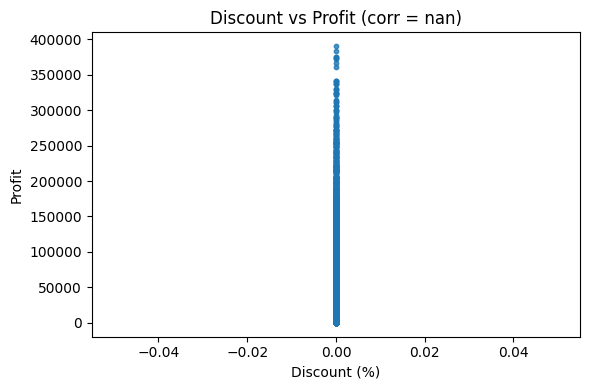

In [43]:
# Cell Q14 – Correlation between Discount (implied) and Profit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure required columns exist
assert 'Sales' in df.columns and 'Profit' in df.columns, "Need 'Sales' and 'Profit'."

# --- STEP 1: Create implied discount if not present ---
if 'Discount' not in df.columns:
    print("No explicit 'Discount' column found — computing IMPLIED DISCOUNT.")
    
    # Convert numeric fields
    for col in ['Price per Unit', 'Quantity', 'Sales']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    list_price = df['Price per Unit'] * df['Quantity']
    # Prevent division by zero
    valid = (list_price > 0) & (~list_price.isna())
    
    df['Discount'] = np.nan
    df.loc[valid, 'Discount'] = (list_price[valid] - df.loc[valid, 'Sales']) / list_price[valid] * 100
    
    # Clip weird negative/above-100 values
    df['Discount'] = df['Discount'].clip(lower=0, upper=100)

# --- STEP 2: Compute correlation ---
corr_value = df[['Discount','Profit']].corr().loc['Discount','Profit']

print("\nPearson correlation (Discount vs Profit):", corr_value)

# --- STEP 3: Visualization ---
plt.figure(figsize=(6,4))
sns.regplot(
    data=df,
    x='Discount',
    y='Profit',
    scatter_kws={'s':10},
    line_kws={'linewidth':1}
)
plt.title(f"Discount vs Profit (corr = {corr_value:.3f})")
plt.xlabel("Discount (%)")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

corr_value

plt.show()


**Q15 — Export a compact summary CSV with key KPIs**

In [41]:
# Cell Q15
kpis = {
    'Total_Sales': df['Sales'].sum() if 'Sales' in df.columns else np.nan,
    'Total_Profit': df['Profit'].sum() if 'Profit' in df.columns else np.nan,
    'Avg_Discount': df['Discount'].mean() if 'Discount' in df.columns else np.nan,
    'Unique_Customers': df['Customer Name'].nunique() if 'Customer Name' in df.columns else np.nan,
    'Unique_Products': df['Product Name'].nunique() if 'Product Name' in df.columns else np.nan,
}
summary_df = pd.DataFrame([kpis])
out_path = "adidas_kpi_summary_q15.csv"
summary_df.to_csv(out_path, index=False)
print("Saved summary to", out_path)
summary_df


Saved summary to adidas_kpi_summary_q15.csv


,Total_Sales,Total_Profit,Avg_Discount,Unique_Customers,Unique_Products
0,899902125.0,3.321348e+08,NaN,NaN,6
